### AI-07 Quiz  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Parameters  

In [2]:
csv_in = '../../ai-05/ai-05/iris.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

#### Read CSV file  

In [5]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=2, header=0)
df_data = df[['petal_len', 'petal_width']]
print(df_data.shape)
display(df_data.head())
ids = df_data.index

(150, 2)


,petal_len,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


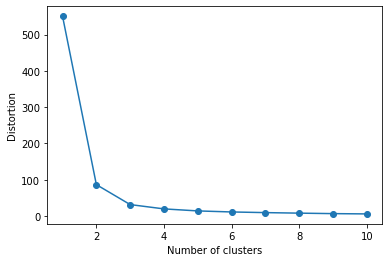

In [6]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df_data)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [7]:
n_cls = 3
km = KMeans(n_clusters=n_cls, random_state=11)
cls = km.fit_predict(df_data)

In [8]:
ct = pd.crosstab(df['class'], cls)
display(ct)

col_0,0,1,2
class,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,4,0,46


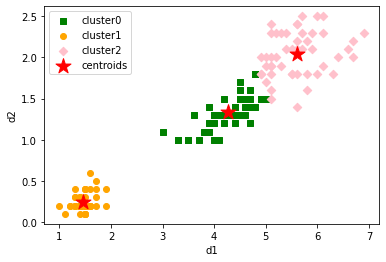

In [9]:
colors = ['green', 'orange', 'pink']
markers = ['s', 'o', 'D']
for i in range(n_cls):
    df_cls = df_data[ cls==i ]
    plt.scatter(df_cls['petal_len'], df_cls['petal_width'],
                c=colors[i], marker=markers[i],
                label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*', c='red',
            label='centroids')
plt.xlabel('d1')
plt.ylabel('d2')
plt.legend()
plt.show()